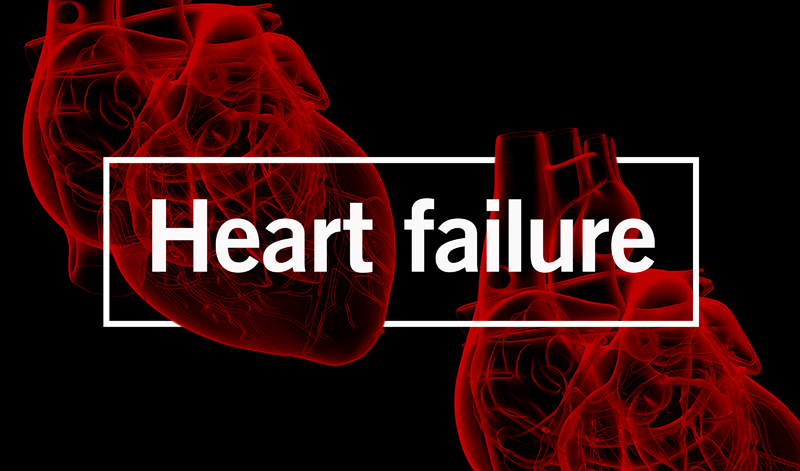

<center><h1 style = "background:black;color:white;border:0;border-radius:3px;font-family:verdana" >📜 Introduction</h1></center>
<p style = "color:black;font-weight:500;text-indent:20px;font-size:16px">Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.
Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.</p>

<p style = "color:black;font-weight:500;text-indent:20px;font-size:16px">What we will do, we will examine these features well, and we will eliminate the situations that will adversely affect our model.Then, we will try to make predictions on the 6 models mentioned below and compare their results. </p>
    

<h2 style = "background:black;color:white;border:0;border-radius:3px;font-family:verdana">📋 Content :</h2>

<ul>
    <li style = "color:darkgray;font-size:15px"> <a href = "#1" style = "color:black;font-weight:bold"> Load and Check Data </a> </li>
    <li style = "color:darkgray;font-size:15px"> <a href = "#2" style = "color:black;font-weight:bold"> Variable Description </a> </li>   
    <li style = "color:darkgray;font-size:15px"> <a href = "#3" style = "color:black;font-weight:bold"> Univariate Variable Analysis </a> <ul> <li style = "color:lightgray"><a href = "#4" style = "color:black;font-weight:500"> Numerical Variable  </a></li> <li style = "color:lightgray"><a href = "#5" style = "color:black;font-weight:500"> Categorical Variable </a></li> </ul>            
    <li style = "color:darkgray;font-size:15px"> <a href = "#6" style = "color:black;font-weight:bold">  Exploratory Data Analysis (EDA)  </a> </li>
            <li style = "color:darkgray;font-size:15px"> <a href = "#7" style = "color:black;font-weight:bold"> Outlier Detection </a> </li>
        <li style = "color:darkgray;font-size:15px"> <a href = "#8" style = "color:black;font-weight:bold"> Feature Engineering </a> <ul> <li style = "color:lightgray"><a href = "#9" style = "color:black;font-weight:500"> What is skewness ?  </a> </ul>
            <li style = "color:darkgray;font-size:15px"> <a href = "#10" style = "color:black;font-weight:bold"> Modeling   </a> <ul> <li style = "color:lightgray"><a href = "#11" style = "background:white;color:#8B0000;border:0;border-radius:3px;font-family:Impact;font-size:14px">1️⃣ XGBoost Model </a></li> <li style = "color:lightgray"><a href = "#12" style = "background:white;color:#8B0000;border:0;border-radius:3px;font-family:Impact;font-size:14px"> 2️⃣ RandomForest Model </a></li> <li style = "color:lightgray"><a href = "#13" style = "background:white;color:#8B0000;border:0;border-radius:3px;font-family:Impact;font-size:14px">3️⃣ Logistic Regression Model </a></li> <li style = "color:lightgray"><a href = "#14" style = "background:white;color:#8B0000;border:0;border-radius:3px;font-family:Impact;font-size:14px"> 4️⃣ DecisionTree Model </a></li> <li style = "color:lightgray"><a href = "#15" style = "background:white;color:#8B0000;border:0;border-radius:3px;font-family:Impact;font-size:14px"> 5️⃣ SVM Model </a></li> <li style = "color:lightgray"><a href = "#16" style = "background:white;color:#8B0000;border:0;border-radius:3px;font-family:Impact;font-size:14px">6️⃣ CatBoost Model </a></li> </ul>
    <li style = "color:darkgray;font-size:15px"> <a href = "#17" style = "color:black;font-weight:bold"> Model Result </a> </ul> 



<h2 style = "background:black;color:white;border:0;border-radius:3px;font-family:verdana" > 📖 Import Library </h2>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

from scipy import stats
from scipy.stats import norm, skew, boxcox
from collections import Counter

from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score, plot_confusion_matrix, auc
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier, Pool
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE

#XGBOOST
from xgboost import XGBClassifier

#warning
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<a id = "1"></a>
<h2 style = "background:black;color:white;border:0;border-radius:3px;font-family:verdana"> ✔️ Load and Check Data </h2>

In [ ]:
data = pd.read_csv("/kaggle/input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv")

In [ ]:
#The Columns
print("Data Columns --> ",data.columns)

In [ ]:
data.head()

In [ ]:
desc = data.describe()
desc

In [ ]:
print(data.isna().sum())

<ul>
    <li style = "color:red"> <p style = "color:black;font-weight:bold"> we checked the columns of the data. No null data. </p>  </li>
</ul>

<a id = "2"></a>
<h2 style = "background:black;color:white;border:0;border-radius:3px;font-family:verdana"> 📝 Variable Description </h2>

<ol>    
    <li style = "color:darkred;font-weight:bold" > <p style = "color:black;font-weight:400" > <strong> age : </strong> the age of the person with heart failure </p> </li>  
    <li style = "color:darkred;font-weight:bold" > <p style = "color:black;font-weight:400" > <strong> anaemia : </strong> Decrease of red blood cells or hemoglobin (boolean) </p> </li>
    <li style = "color:darkred;font-weight:bold" > <p style = "color:black;font-weight:400" > <strong> creatinine_phosphokinase : </strong> Level of the CPK enzyme in the blood (mcg/L) </p> </li>  
    <li style = "color:darkred;font-weight:bold" > <p style = "color:black;font-weight:400" > <strong> diabetes : </strong> If the patient has diabetes (boolean) </p> </li>
    <li style = "color:darkred;font-weight:bold" > <p style = "color:black;font-weight:400" > <strong> ejection_fraction : </strong> Percentage of blood leaving the heart at each contraction (percentage) </p> </li>  
    <li style = "color:darkred;font-weight:bold" > <p style = "color:black;font-weight:400" > <strong> high_blood_pressure  : </strong> If the patient has hypertension (boolean) </p> </li>
    <li style = "color:darkred;font-weight:bold" > <p style = "color:black;font-weight:400" > <strong> platelets : </strong> Platelets in the blood (kiloplatelets/mL) </p> </li>  
    <li style = "color:darkred;font-weight:bold" > <p style = "color:black;font-weight:400" > <strong> serum_creatinine : </strong> Level of serum creatinine in the blood (mg/dL) </p> </li>
    <li style = "color:darkred;font-weight:bold" > <p style = "color:black;font-weight:400" > <strong> serum_sodium : </strong>Level of serum sodium in the blood (mEq/L) </p> </li>
    <li style = "color:darkred;font-weight:bold" > <p style = "color:black;font-weight:400" > <strong> sex : </strong> Woman or man (binary) </p> </li>
    <li style = "color:darkred;font-weight:bold" > <p style = "color:black;font-weight:400" > <strong> smoking : </strong> If the patient smokes or not (boolean) </p> </li>
    <li style = "color:darkred;font-weight:bold" > <p style = "color:black;font-weight:400" > <strong> time : </strong> Follow-up period (days) </p> </li>
    <li style = "color:darkred;font-weight:bold" > <p style = "color:black;font-weight:400" > <strong> DEATH_EVENT : </strong> If the patient deceased during the follow-up period (boolean) </p> </li>
</ol>

In [ ]:
data.info()

<ul>    
    <li style = "color:darkred;font-weight:bold" > <p style = "color:black;font-weight:400" > <strong> float64 : </strong> age, platelets, serum_creatinine</p> </li> 
    <li style = "color:darkred;font-weight:bold" > <p style = "color:black;font-weight:400" > <strong> int64 : </strong> We see that all our remaining columns are int.</p> </li>
</ul>

<a id = "3"></a>
<h2 style = "background:black;color:white;border:0;border-radius:3px;font-family:verdana"> ✍️ Univariate Variable Analysis </h2>

<ul>    
    <li style = "color:darkred;font-weight:bold" > <p style = "color:black;font-weight:400" > <strong> We see that our data consists of float and int columns. But there are some striking columns here. We see that these are categorical. Let's examine these columns.  </strong>  </p>
        <ul>
            <li style = "color:gray"> <p style = "color:black"> Numerical Variable </p> </li>
            <li style = "color:gray"> <p style = "color:black"> Categorical Variable </p> </li>
        </ul>
    </li> 
</ul>

<a id = "4"></a>
<h3 style = "background:black;color:white;border:0;border-radius:3px;font-family:verdana"> 🔢 Numerical Variable </h3>

In [ ]:
def plot_hist(variable):
    print("min {} : {} ".format(variable, min(data[variable])))
    print("max {} : {}".format(variable, max(data[variable])))
    
    plt.figure(figsize=(9,3))
    plt.hist(data[variable], color="darkred")
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist ".format(variable))
    plt.show()

In [ ]:
numericVar = ["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium","time"]
for n in numericVar:
    plot_hist(n)

<a id = "5"></a>
<h3 style = "background:black;color:white;border:0;border-radius:3px;font-family:verdana"> 💹 Categorical Variable </h3>

In [ ]:
def bar_plot(variable):
    
    # get feature
    var = data[variable]
    #count number of categorical variable (value/sample)
    varValue = var.value_counts()

    #visualize
    plt.figure(figsize=(9,3))
    plt.bar(varValue.index, varValue,color = "lightgreen", edgecolor = "black", linewidth = 2)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))

In [ ]:
category = ["anaemia","diabetes","high_blood_pressure","sex","smoking","DEATH_EVENT"]
for c in category:
    bar_plot(c)

<a id = "6"></a>
<h2 style = "background:black;color:white;border:0;border-radius:3px;font-family:verdana"> 🔍 Exploratory Data Analysis (EDA) </h2>

In [ ]:
corr_matrix = data.corr()
sns.clustermap(corr_matrix, annot = True, fmt = ".2f")
plt.title("Correlaation btw features")
plt.show()

<ul>    
    <li style = "color:darkred;font-weight:bold" > <p style = "color:black;font-weight:400" > <strong> We draw the relationship matrix and examine the relationships between properties..  </strong>  </p> </li>
    <li style = "color:darkred;font-weight:bold" > <p style = "color:black;font-weight:400" > <strong> If the relation between properties is 1 it means that it is true and -1 means it is inversely proportional.  </strong>  </p> </li> 
</ul>

In [ ]:
threshold = 0.2 
filtre = np.abs(corr_matrix["DEATH_EVENT"]) > threshold
corr_features = corr_matrix.columns[filtre].tolist()
sns.clustermap(data[corr_features].corr(), annot = True, fmt = ".2f")
plt.title("Correlation Between Features w Corr Theshold 0.75")
plt.show()

In [ ]:
#pair plot
sns.pairplot(data[corr_features], diag_kind = "kde", markers = "+", hue = "DEATH_EVENT")
plt.show()

<a id = "7"></a>
<h2 style = "background:black;color:white;border:0;border-radius:3px;font-family:verdana"> 🕵️‍ Outlier Detection </h2>

In [ ]:
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3st quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier Step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces 
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 1) 
    
    return multiple_outliers

In [ ]:
data.loc[detect_outliers(data,["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium","time"])]

In [ ]:
data = data.drop(detect_outliers(data,["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium","time"]),axis = 0).reset_index(drop=True)

<ul>    
    <li style = "color:darkred;font-weight:bold" > <p style = "color:black;font-weight:400" > <strong> We reduce our outliers from our data.  </strong>  </p> </li> 
</ul>

<a id = "8"></a>
<h2 style = "background:black;color:white;border:0;border-radius:3px;font-family:verdana"> 💻 Feature Engineering </h2>

<a id = "9"></a>
<h3 style = "background:black;color:white;border:0;border-radius:3px;font-family:verdana"> ❓ What is skewness ? </h3>

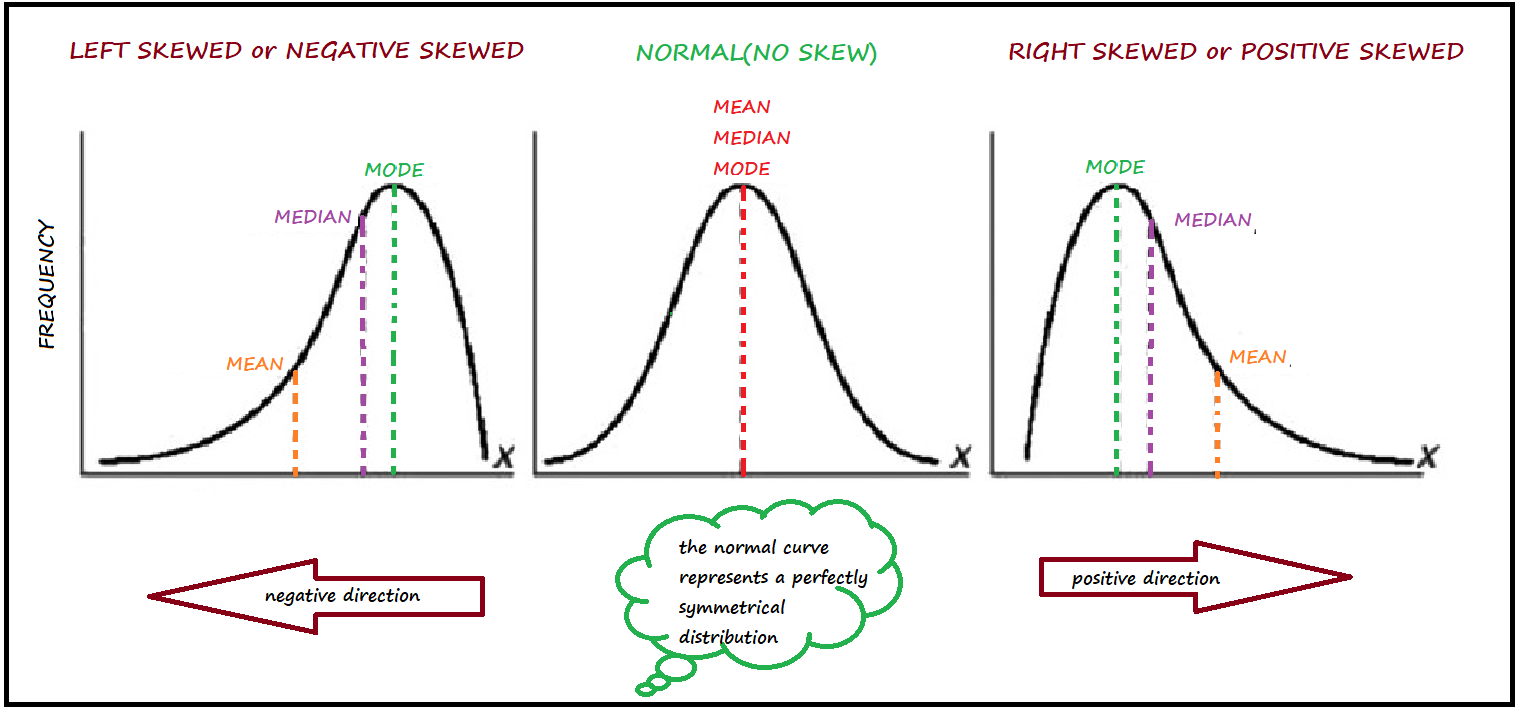

<p style = "color:black;font-weight:500" > <strong> Skewness : </strong> Skewness refers to a distortion or asymmetry that deviates from the symmetrical bell curve, or normal distribution, in a set of data. In simple terms, it is how much a variable deviates from the normal distribution.  </p>

<p style = "color:black;font-weight:700" >There are two types.</p>

<ul> 
    <li style = "color:darkred;font-weight:500" >Right Skewed or Positive Skewed </li>
    <li style = "color:darkred;font-weight:500" >Left Skewed or Negative Skewed</li>
</ul>


<p style = "color:black;font-weight:500" >Right Skewed or Positive Skewed --> The distribution has a rightward tail with respect to the normal distribution.</p>

<p style = "color:black;font-weight:500" >Left Skewed or Negative Skewed --> The distribution has a tail to the left relative to the normal distribution.</p>

<h3 style = "color:gray" >
Why is it important?</h3>
<p style = "color:black;font-weight:500" >The model has difficulty in estimating the correct value at other points while focusing on the dense point while predicting on data that does not show a normal distribution.</p>

<p style = "color:black;font-weight:500" >What do we do, we will look at our skewness values. If it is greater than 1, there is positive skewness, if it is less than -1, there is negative skewness.</p>

<h5>Let's start.</h5>

In [ ]:
skewed_feats = data.apply(lambda x: skew(x.dropna())).sort_values(ascending = False)
skewness = pd.DataFrame(skewed_feats, columns = ["skewed"])
skewness

<ul>
    <li style = "color:darkred;font-weight:bold" > <p style = "color:black;font-weight:400" > <strong> As we said in the definition above, we find our skewness values. </strong> </p> </li>
</ul>

In [ ]:
# creatinine_phosphokinase
sns.distplot(data["creatinine_phosphokinase"], fit = norm)
plt.show()
(mu, sigma) = norm.fit(data["creatinine_phosphokinase"])
print("mu {} : {}, sigma {} : {}".format("creatinine_phosphokinase", mu, "creatinine_phosphokinase", sigma))
print()

<ul>
    <li style = "color:darkred;font-weight:bold" > <p style = "color:black;font-weight:400" > <strong> We also see the skewness of the value of creatine phosphokinase on the graph.</strong> </p> </li>
        <li style = "color:darkred;font-weight:bold" > <p style = "color:black;font-weight:400" > <strong> We fix this disorder by using boxcox. </strong> </p> </li>
</ul>

In [ ]:
data["creatinine_phosphokinase"], lam = boxcox(data["creatinine_phosphokinase"])

In [ ]:
# creatinine_phosphokinase
sns.distplot(data["creatinine_phosphokinase"], fit = norm)
plt.show()
(mu, sigma) = norm.fit(data["creatinine_phosphokinase"])
print("mu {} : {}, sigma {} : {}".format("creatinine_phosphokinase", mu, "creatinine_phosphokinase", sigma))
print()

<ul>
    <li style = "color:darkred;font-weight:bold" > <p style = "color:black;font-weight:400" > <strong> We can take a look at the improvement by examining the graph again. </strong> </p> </li>
</ul>

In [ ]:
# serum_creatinine
sns.distplot(data["serum_creatinine"], fit = norm)
plt.show()
(mu, sigma) = norm.fit(data["serum_creatinine"])
print("mu {} : {}, sigma {} : {}".format("serum_creatinine", mu, "serum_creatinine", sigma))
print()

In [ ]:
data["serum_creatinine"], lam_serum_creatine = boxcox(data["serum_creatinine"])

In [ ]:
# serum_creatinine
sns.distplot(data["serum_creatinine"], fit = norm)
plt.show()
(mu, sigma) = norm.fit(data["serum_creatinine"])
print("mu {} : {}, sigma {} : {}".format("serum_creatinine", mu, "serum_creatinine", sigma))
print()

In [ ]:
# ejection_fraction
sns.distplot(data["ejection_fraction"], fit = norm)
plt.show()
(mu, sigma) = norm.fit(data["ejection_fraction"])
print("mu {} : {}, sigma {} : {}".format("ejection_fraction", mu, "smejection_fractionoking", sigma))
print()

In [ ]:
data["ejection_fraction"], lam_serum_creatine = boxcox(data["ejection_fraction"])

In [ ]:
# ejection_fraction
sns.distplot(data["ejection_fraction"], fit = norm)
plt.show()
(mu, sigma) = norm.fit(data["ejection_fraction"])
print("mu {} : {}, sigma {} : {}".format("ejection_fraction", mu, "smejection_fractionoking", sigma))
print()

In [ ]:
# platelets
sns.distplot(data["platelets"], fit = norm)
plt.show()
(mu, sigma) = norm.fit(data["platelets"])
print("mu {} : {}, sigma {} : {}".format("platelets", mu, "platelets", sigma))
print()

In [ ]:
data["platelets"], lam_serum_creatine = boxcox(data["platelets"])

In [ ]:
# platelets
sns.distplot(data["platelets"], fit = norm)
plt.show()
(mu, sigma) = norm.fit(data["platelets"])
print("mu {} : {}, sigma {} : {}".format("platelets", mu, "platelets", sigma))
print()

In [ ]:
skewed_feats = data.apply(lambda x: skew(x.dropna())).sort_values(ascending = False)
skewness_new = pd.DataFrame(skewed_feats, columns = ["skewed"])
skewness_new

<ul>
    <li style = "color:darkred;font-weight:bold" > <p style = "color:black;font-weight:400" > <strong> You can take a look at the change by comparing it with the skew chart above. </strong> </p> </li>
</ul>

In [ ]:
#AGE
g = sns.FacetGrid(data, col = "DEATH_EVENT")
g.map(sns.distplot, "age", bins = 25)
plt.show()

<a id = "10"></a>
<h2 style = "background:black;color:white;border:0;border-radius:3px;font-family:verdana"> 📁 Modeling </h2>

<p  style = "color:black;font-weight:500" > We will carry out our trainings using the models you see below. Finally, we will compare their achievements. </p>
<ul>
    <li style = "color:darkred;font-weight:bold" > XGBoost Model</li>
     <li style = "color:darkred;font-weight:bold" >RandomForest Model</li>
     <li style = "color:darkred;font-weight:bold" >Logistic Regression Model</li>
     <li style = "color:darkred;font-weight:bold" >DesisionTree Model</li>
     <li style = "color:darkred;font-weight:bold" >SVM Model</li>
     <li style = "color:darkred;font-weight:bold" >CatBoost Model</li>
</ul>

In [ ]:
X = data.drop("DEATH_EVENT", axis = 1)
y = data.DEATH_EVENT

<ul>
    <li style = "color:darkred;font-weight:bold" > <p style = "color:black;font-weight:400" > <strong> We determine x and y. </strong> </p> </li>
</ul>

In [ ]:
X.head()

In [ ]:
print("Before Smote")
y.value_counts()

<ul>
    <li style = "color:darkred;font-weight:bold" > <p style = "color:black;font-weight:400" > <strong> We can't call our data too irregular, but we'd better get rid of this disorder anyway. </strong> </p> </li>
</ul>

In [ ]:
sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X, y)

In [ ]:
print("After Smote")
y_sm.value_counts()

<h3 style = "background:black;color:white;border:0;border-radius:3px;font-family:verdana"> 📊 Train - Test Split </h3>

In [ ]:
test_size = 0.2
X_train, X_test, Y_train, Y_test = train_test_split(X_sm, y_sm, test_size = test_size, random_state = 42)

In [ ]:
print("X_train shape {}, len {}.".format(X_train.shape,len(X_train)))
print("X_test shape {}, len {}.".format(X_test.shape,len(X_test)))
print("Y_train shape {}, len {}.".format(Y_train.shape,len(Y_train)))
print("Y_test shape {}, len {}.".format(Y_test.shape,len(Y_test)))

In [ ]:
# list to keep our results
result_acc = []

<a id = "11"></a>
<h3 style = "background:black;color:white;border:0;border-radius:3px;font-family:verdana"> 1️⃣ XGBoost model </h3>

In [ ]:
XGB = XGBClassifier(max_depth = 1)
XGB.fit(X_train, Y_train)
y_pred_xgb = XGB.predict(X_test)
cm_xgb = confusion_matrix(y_pred_xgb, Y_test)
acc_xgb = accuracy_score(Y_test, y_pred_xgb)
result_acc.append(acc_xgb)
print("RESULT")
print("XGBoost Model Acc : ",acc_xgb)
print("XGBoost Model Cm : ",cm_xgb)

<a id = "12"></a>
<h3 style = "background:black;color:white;border:0;border-radius:3px;font-family:verdana"> 2️⃣ Random Forest Model</h3>

<ul>
        <li style = "color:darkred;font-weight:bold" > <p style = "color:black;font-weight:400" > <strong> First of all, we will find our important features for that model and we will use them. </strong> </p> </li>
            <li style = "color:darkred;font-weight:bold" > <p style = "color:black;font-weight:400" > <strong> we will do this for all other models too. </strong> </p> </li>
</ul>

In [ ]:
model_rnd = RandomForestClassifier()
model_rnd.fit(X_train, Y_train)
importance = model_rnd.feature_importances_

# plot feature importance
plt.bar([x for x in range(len(importance))], importance, color = "red")
plt.show()

In [ ]:
x_train_random_forest = X_train[["age","creatinine_phosphokinase","ejection_fraction","serum_creatinine","time"]]
x_test_random_forest = X_test[["age","creatinine_phosphokinase","ejection_fraction","serum_creatinine","time"]]

In [ ]:
random_forest_model = RandomForestClassifier(max_depth=7, random_state=25)
random_forest_model.fit(x_train_random_forest, Y_train)
y_pred_random_forest = random_forest_model.predict(x_test_random_forest)
cm_random_forest = confusion_matrix(y_pred_random_forest, Y_test)
acc_random_forest = accuracy_score(Y_test, y_pred_random_forest)
result_acc.append(acc_random_forest)
print("RESULT")
print("Random Forest Model Acc : ",acc_random_forest)
print("Random Forest Model Cm : ",cm_random_forest)

<a id = "13"></a>
<h3 style = "background:black;color:white;border:0;border-radius:3px;font-family:verdana"> 3️⃣ Logistic Regression Model</h3>

In [ ]:
model_log_reg = LogisticRegression()
model_log_reg.fit(X_train, Y_train)
importance = model_log_reg.coef_[0]

plt.bar([x for x in range(len(importance))], importance, color = "orange")
plt.show()

In [ ]:
x_train_log_reg = X_train[["creatinine_phosphokinase","ejection_fraction","serum_creatinine","sex"]]
x_test_log_reg = X_test[["creatinine_phosphokinase","ejection_fraction","serum_creatinine","sex"]]

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(x_train_log_reg, Y_train)
y_pred_log = log_reg.predict(x_test_log_reg)
cm_log_reg = confusion_matrix(y_pred_log, Y_test)
acc_log_reg = accuracy_score(Y_test, y_pred_log)
result_acc.append(acc_log_reg)
print("RESULT")
print("Logistic Regression Model Acc : ",acc_log_reg)
print("Logistic Regression Model Cm : ",cm_log_reg)

<a id = "14"></a>
<h3 style = "background:black;color:white;border:0;border-radius:3px;font-family:verdana"> 4️⃣ DecisionTree Model</h3>

In [ ]:
model_decision_tree = DecisionTreeClassifier()
model_decision_tree.fit(X_train, Y_train)
importance = model_decision_tree.feature_importances_

plt.bar([x for x in range(len(importance))], importance, color = "blue")
plt.show()

In [ ]:
x_train_dec = X_train[["creatinine_phosphokinase","ejection_fraction","time"]]
x_test_dec = X_test[["creatinine_phosphokinase","ejection_fraction","time"]]

In [ ]:
dt_param_grid = {"min_samples_split" : range(10,500,20),
                "max_depth": range(1,20)}

decision_tree = DecisionTreeClassifier()
clf = GridSearchCV(decision_tree, param_grid=dt_param_grid, cv = StratifiedKFold(n_splits = 10), scoring = "accuracy", n_jobs = -1,verbose = 1)
clf.fit(x_train_dec,Y_train)

y_pred_decision_tree = clf.predict(x_test_dec)
cm_y_pred_decision_tree = confusion_matrix(y_pred_decision_tree, Y_test)
acc_y_pred_decision_tree = accuracy_score(Y_test, y_pred_decision_tree)
result_acc.append(acc_y_pred_decision_tree)
print("RESULT")
print("Decision Tree Model Acc : ",acc_y_pred_decision_tree)
print("Decision Tree Model Cm : ",cm_y_pred_decision_tree)

<a id = "15"></a>
<h3 style = "background:black;color:white;border:0;border-radius:3px;font-family:verdana"> 5️⃣ SVM Model</h3>

In [ ]:
model_svm = SVC(kernel="linear")
model_svm.fit(X_train, Y_train)
importance = model_svm.coef_[0]

plt.bar([x for x in range(len(importance))], importance, color = "brown")
plt.show()

In [ ]:
x_train_svm = X_train[["creatinine_phosphokinase","ejection_fraction","serum_creatinine","sex"]]
x_test_svm = X_test[["creatinine_phosphokinase","ejection_fraction","serum_creatinine","sex"]]

In [ ]:
svm = SVC()
svm.fit(x_train_svm, Y_train)
y_pred_svm = svm.predict(x_test_svm)
cm_svm = confusion_matrix(y_pred_svm, Y_test)
acc_svm = accuracy_score(Y_test, y_pred_svm)
result_acc.append(acc_svm)
print("RESULT")
print("SVM Model Acc : ",acc_svm)
print("SVM Model Cm : ",cm_svm)

<a id = "16"></a>
<h3 style = "background:black;color:white;border:0;border-radius:3px;font-family:verdana"> 6️⃣ CatBoost  Model</h3>

In [ ]:
best_params = {'bagging_temperature': 0.8,
               'depth': 5,
               'iterations': 500,
               'l2_leaf_reg': 30,
               'learning_rate': 0.05,
               'random_strength': 0.8}

model_cat_boost = CatBoostClassifier(
        **best_params,
        loss_function='Logloss',
        eval_metric='Accuracy',         
        nan_mode='Min',
        verbose=False
    )

model_cat_boost.fit(
        X_train, Y_train,
        verbose_eval=100, 
        early_stopping_rounds=50,
        eval_set=(X_test, Y_test),
        use_best_model=False,
        plot=True
)

y_pred_cat_boost = model_cat_boost.predict(X_test)

cm_cat_boost = confusion_matrix(y_pred_cat_boost, Y_test)
acc_cat_boost = accuracy_score(Y_test, y_pred_cat_boost)
result_acc.append(acc_cat_boost)
print("RESULT")
print("Cat Boost Model Acc : ",acc_cat_boost)
print("Cat Boost Model Cm : ",cm_cat_boost)

<a id = "17"></a>
<h2 style = "background:black;color:white;border:0;border-radius:3px;font-family:verdana"> 📈 Model Result</h2>

In [ ]:
results = pd.DataFrame({"Model Result":result_acc, 
                        "Models":["XGBoost",
                                  "RandomForest",
                                  "LogisticRegression",
                                  "DecisionTree", 
                                  "SVM",
                                  "CatBoost"]})

In [ ]:
results

In [ ]:
g = sns.barplot("Model Result", "Models", data = results)
g.set_xlabel("Accuracy")
g.set_title("Models Result", color = "darkred")
plt.show()

<ul>
    <li style = "color:darkred;font-weight:bold" > <p style = "color:black;font-weight:400" > <strong> yes, we have come to the end. As you can see, our biggest success with random forest is 97.5 </strong> </p> </li>
</ul>